In [15]:
import arviz as az
import os.path as op
import seaborn as sns
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
az.rcParams["data.load"] = 'eager'

In [17]:
bids_folder = '/data/ds-risk'

In [10]:
df = []
keys = []
for mask, parameter in product(['lc', 'vta', 'snc', 'meynert'], ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask, parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


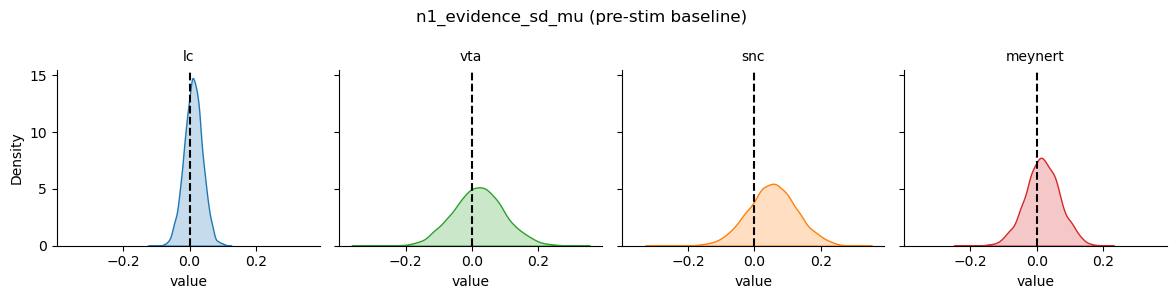

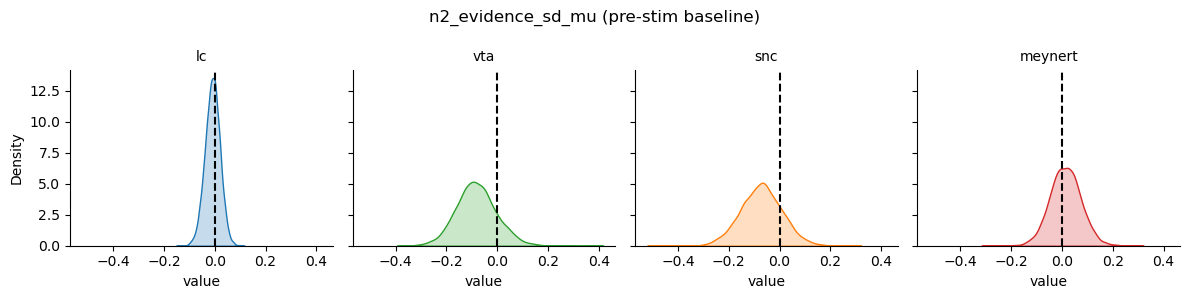

In [38]:
for key in ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']:
    fac = sns.FacetGrid(df.xs(key, 0, 'parameter').reset_index(), col='mask', col_wrap=4, hue='mask',
    hue_order=['lc', 'snc', 'vta', 'meynert'])
    fac.map(sns.kdeplot, 'value', fill=True)
    fac.set_titles('{col_name}')

    fac.map(lambda *args, **kwargs: plt.axvline(0.0, c='k', ls='--'))

    fac.fig.suptitle(f'{key} (pre-stim baseline)')

    plt.tight_layout()

In [39]:
# LC *Response*

In [40]:
df = []
keys = []
for mask, parameter in product(['lc', 'vta', 'snc', 'meynert'], ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']):
    idata = az.from_netcdf(f'/data/ds-risk/derivatives/cogmodels/ses-7t2_model-subcortical_response2_{mask}_trace.netcdf')
    df.append(idata.posterior[parameter].to_dataframe().xs(mask, 0, -1)[parameter])
    keys.append((mask, parameter))

df = pd.concat(df, keys=keys, names=['mask', 'parameter']).to_frame('value')


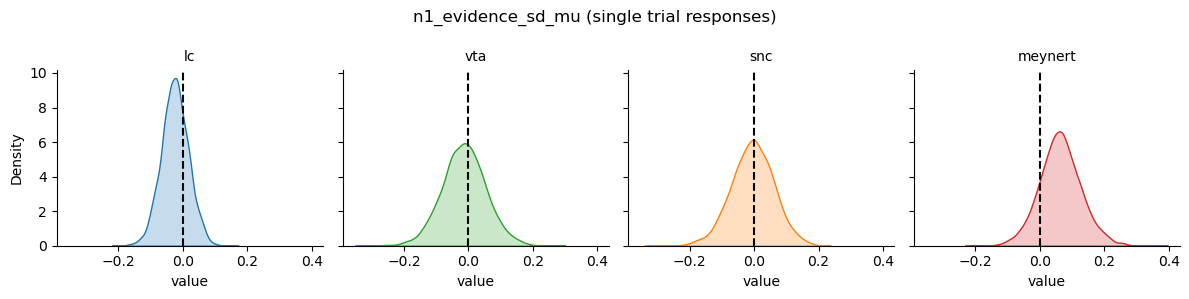

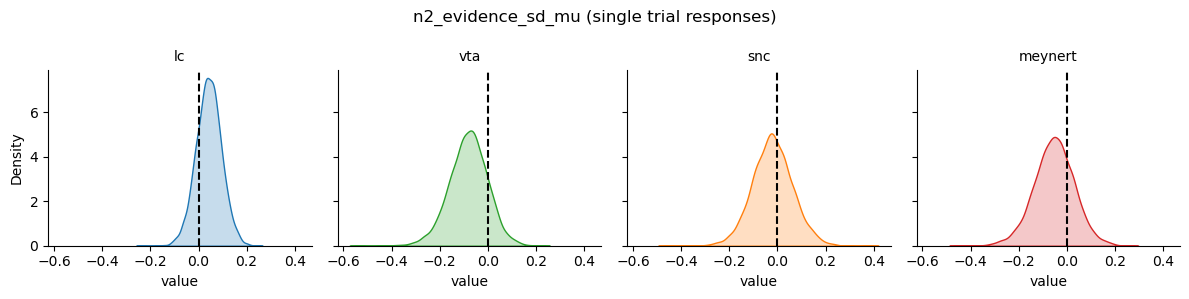

In [43]:
for key in ['n1_evidence_sd_mu', 'n2_evidence_sd_mu']:
    fac = sns.FacetGrid(df.xs(key, 0, 'parameter').reset_index(), col='mask', col_wrap=4, hue='mask',
    hue_order=['lc', 'snc', 'vta', 'meynert'])
    fac.map(sns.kdeplot, 'value', fill=True)
    fac.set_titles('{col_name}')

    fac.map(lambda *args, **kwargs: plt.axvline(0.0, c='k', ls='--'))

    fac.fig.suptitle(f'{key} (single trial responses)')

    plt.tight_layout()